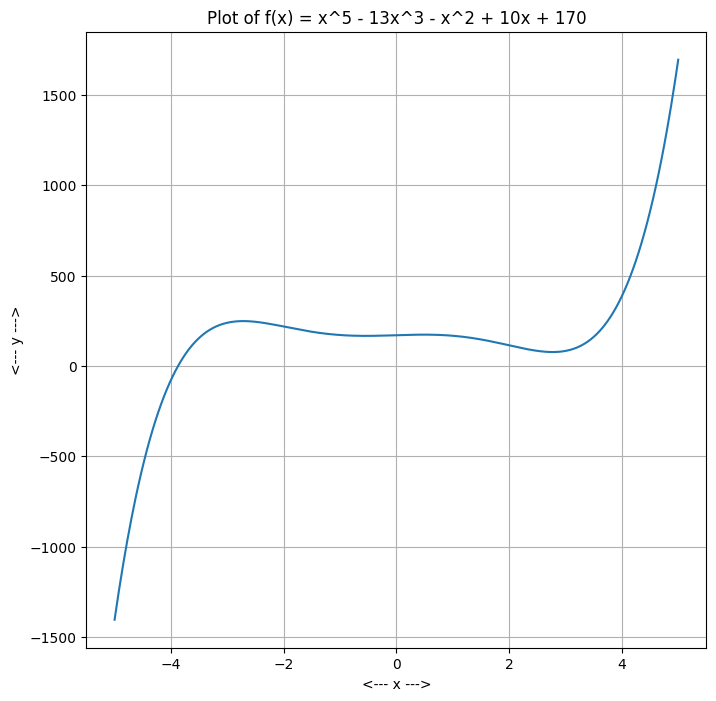

Number of real roots: 1


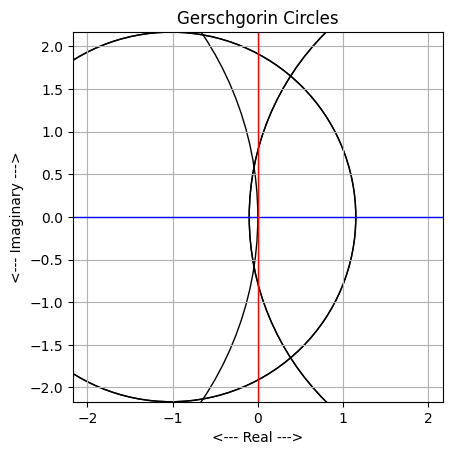

In [41]:
#roll_no - ch22b057

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**5 - 13*x**3 - x**2 + 10*x + 170

x = np.linspace(-5, 5, 400)
y = f(x)

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Plot of f(x) = x^5 - 13x^3 - x^2 + 10x + 170')
plt.grid(True)
plt.show()

coefficients = [1, 0, -13, -1, 10, 170]  
roots = np.roots(coefficients)
real_roots = np.isreal(roots).sum()
print("Number of real roots:", real_roots)

def calculate_gerschgorin_circles(coefficients):
    degree = len(coefficients) - 1
    roots = np.roots(coefficients)
    real_roots = np.isreal(roots)
    circles = []

    for root in roots:
        circle_center = np.real(root)
        circle_radius = np.abs(root)

        if degree % 2 == 0:
            circle_radius /= 2

        circles.append((circle_center, circle_radius))

    return circles

def plot_gerschgorin_circles(circles):
    fig, ax = plt.subplots()

    for circle in circles:
        circle_center, circle_radius = circle
        circle_plot = plt.Circle((circle_center, 0), circle_radius, fill=False)
        ax.add_patch(circle_plot)

    ax.axhline(0, color='blue', linewidth=1)
    ax.axvline(0, color='red', linewidth=1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('<--- Real --->')
    ax.set_ylabel('<--- Imaginary --->')

    plt.xlim(-max(circle_radius, 1.5), max(circle_radius, 1.5))
    plt.ylim(-max(circle_radius, 1.5), max(circle_radius, 1.5))
    plt.title('Gerschgorin Circles')
    plt.grid(True)
    plt.show()

gerschgorin_circles = calculate_gerschgorin_circles(coefficients)
plot_gerschgorin_circles(gerschgorin_circles)


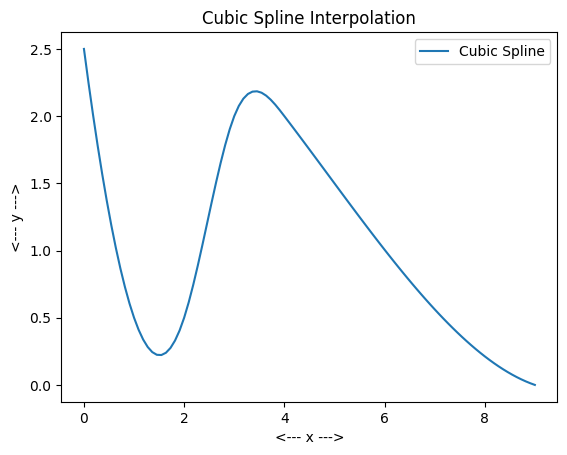

Polynomial equation:            6          5         4         3         2
-0.008573 x + 0.1828 x - 1.375 x + 4.366 x - 4.953 x - 0.2129 x + 2.5


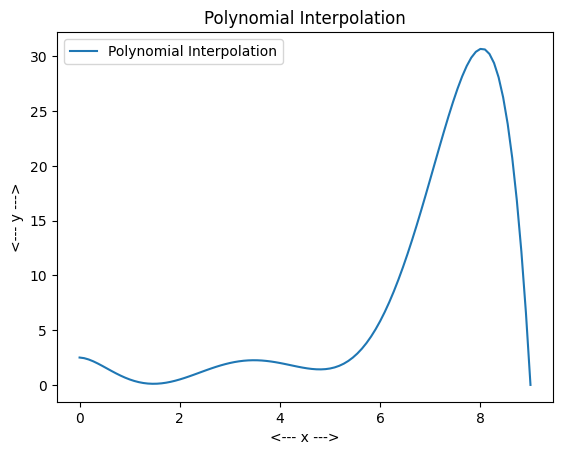

In [58]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

#Cubic Spline Interpolation
x = [0, 1, 2, 3, 4, 5, 9] 
y = [2.5, 0.5, 0.5, 2, 2, 1.5, 0]  
cubic_spline = CubicSpline(x, y)

x_values = np.linspace(0, 9, 100)
y_values = cubic_spline(x_values)

plt.plot(x_values, y_values, label='Cubic Spline')
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

#Polynomial Interpolation
degree = 6
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)
y_values = polynomial(x_values)
print("Polynomial equation:", polynomial)


plt.plot(x_values, y_values, label='Polynomial Interpolation')
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Polynomial Interpolation')
plt.legend()
plt.show()



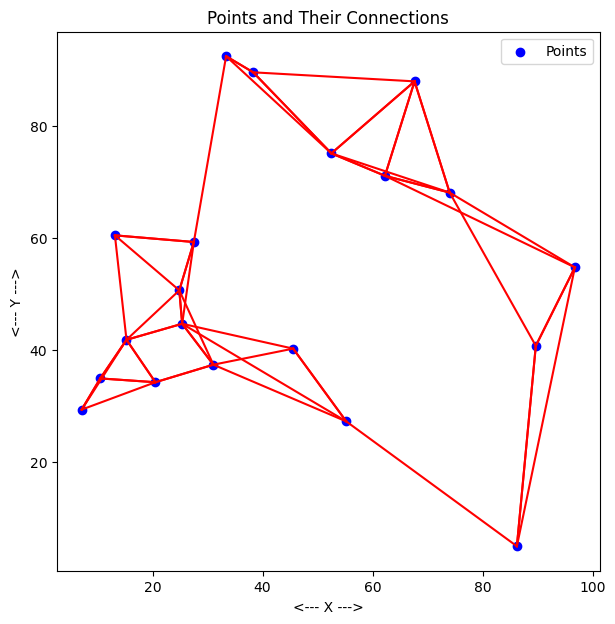

In [56]:
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(20, 2) * 100
distances = np.linalg.norm(points, axis=1)
sorted_indices = np.argsort(distances)

with open('assn2b.txt', 'w') as f:
    for c in sorted_indices:
        f.write(f'{points[c, 0]:.2f}, {points[c, 1]:.2f}\n')

dist_matrix = np.linalg.norm(points[:, np.newaxis, :] - points, axis=2)
nearest_indices = np.argsort(dist_matrix, axis=1)[:, 1:4]

plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], color='b', label='Points')
for i in range(20):
    for j in nearest_indices[i]:
        plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], color='r')
plt.xlabel('<--- X --->')
plt.ylabel('<--- Y --->')
plt.title('Points and Their Connections')
plt.legend()
plt.show()


In [74]:
import random

inside = 0
outside = 0
for _ in range(2000):
    x = random.uniform(-50, 50)
    y = random.uniform(-50, 50)
    Dist_center = (x)**2 + (y)**2 
    
    if Dist_center <= 38**2:  #Custom value of radius that we have taken
        inside += 1
    else:
        outside += 1

ratio = inside / outside
pie = 4 * ratio

print("Calculated value of Pie:", pie)


Calculated value of Pie: 3.292616226071103


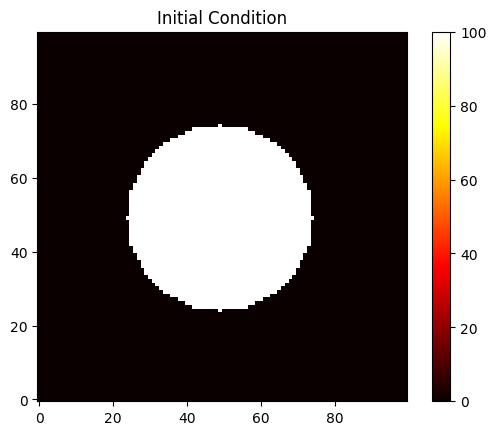

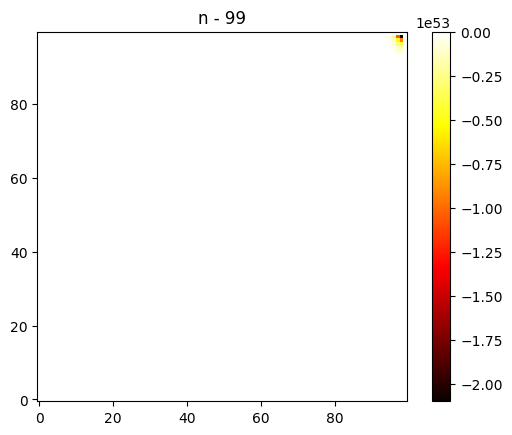

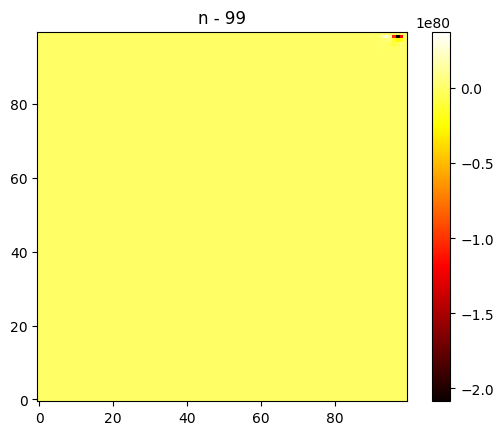

In [79]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
T = np.zeros((size, size))
center = (size // 2, size // 2)
radius = 25

for i in range(1, size + 1):
    for j in range(1, size + 1):
        distance = ((i - center[0]) ** 2 + (j - center[1]) ** 2) ** 0.5
        if distance <= radius:
            T[i-1, j-1] = 100

plt.imshow(T, cmap='hot', origin='lower')
plt.colorbar()
plt.title("Initial Condition")
plt.show()

n = 100
lambda_value = 0.2
for step in range(n):
    for i in range(2, 99):
        for j in range(2, 99):
            T[i, j] = T[i,j] + lambda_value*T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] - 4*T[i,j]
    if step == 10 or step == 50 or step == 100:
        plt.imshow(T, cmap='hot', origin='lower')
        plt.colorbar()
        plt.title("Step " + str(step))
        plt.show()



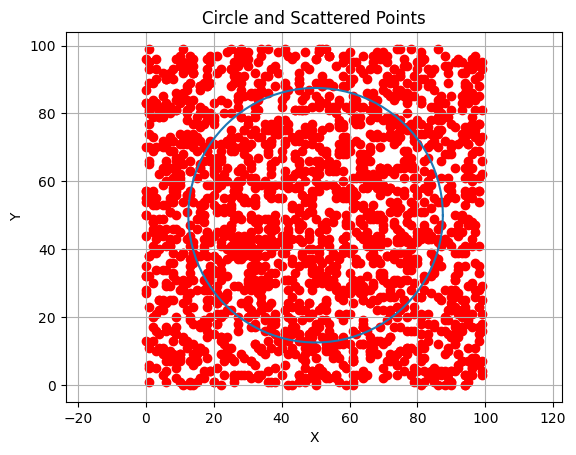

3.5046904315196996


In [8]:
import random
import numpy as np

import matplotlib.pyplot as plt
number = 2000
x=np.arange(number)
y=np.arange(number)
centre=(50,50)
diameter= 75
inside=0
total=0
outside=0


for i in range(number):
    x[i]= random.uniform(0,100)
    y[i]=random.uniform(0,100)
    distance=((x[i]-centre[0])**2 + (y[i]-centre[1])**2)**0.5
    if distance <= diameter/2 :
        inside=inside+1
    else:
        outside=outside+1
    total=total+1


theta = np.linspace(0, 2 * np.pi, 100)
radius=diameter/2

x_circle = centre[0] + radius * np.cos(theta)
y_circle = centre[1] + radius * np.sin(theta)
plt.plot(x_circle, y_circle,  label='Circle')

plt.scatter(x, y, color='red', label=' Points')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circle and Scattered Points')
plt.grid()
plt.show()



In [9]:
ratio=inside/outside
pie=ratio*4
print(float(pie))

3.5046904315196996


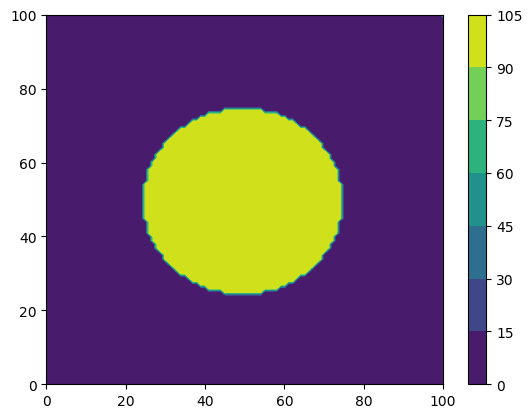

In [10]:
import numpy as np
import matplotlib.pyplot as plt


size=100
size1=100-1
T=np.zeros((size+1, size+1), dtype=float)


centre = (size1/2, size1/2)
radius = 25.0
distance = 0.0
centre



for i in range(1,size+1):
    for j in range(1, size+1):
        distance=np.sqrt((i-centre[0])**2 +(j-centre[1])**2)
        #print(distance)
        if distance <= radius :
            T[i,j] = 100.0
            #print(distance)
            #print(T[i,j])
        else :
            T[i,j] = 0.0
            
        


x=list(range(0,size+1))
y=list(range(0,size+1))
T[1,1]=5
T[100,100]=78



plt.contourf(x,y,T)
plt.colorbar()
plt.show()






    



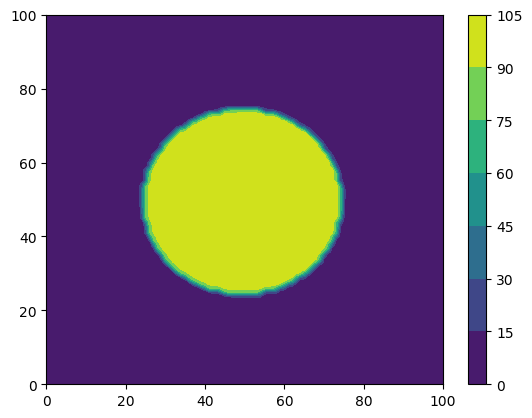

In [11]:
n=100
a=0.2



for number in range(n):
    T_new = np.copy(T)
    for i in range(2,size):
        for j in range(2,size):
            T_new[i,j]= T[i,j] +a*(T_new[i+1,j] + T_new[i-1,j] + T_new[i,j+1] + T_new[i,j-1] -4*T_new[i,j])
    for j in range(1, size+1):
        T_new[1,j] = T_new[2,j]
        T_new[100,j] = T_new[99,j]
    for i in range(1,100):
        T_new[i,1] = T_new[i,2]
        T_new[1,100] = T_new[i,99]




plt.contourf(x,y,T_new)
plt.colorbar()
plt.show()

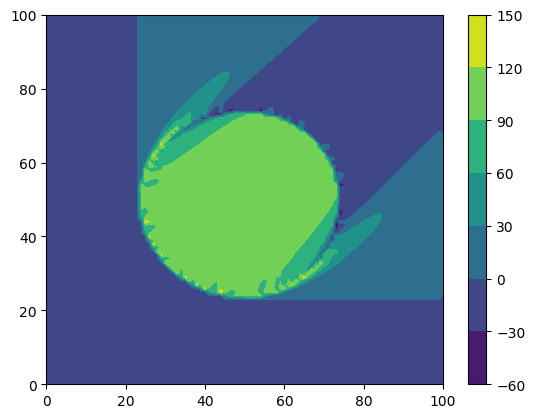

In [12]:
n=100
a=0.5



for number in range(n):
    T_new = np.copy(T)
    for i in range(2,size):
        for j in range(2,size):
            T_new[i,j]= T[i,j] +a*(T_new[i+1,j] + T_new[i-1,j] + T_new[i,j+1] + T_new[i,j-1] -4*T_new[i,j])
    for j in range(1, size+1):
        T_new[1,j] = T_new[2,j]
        T_new[100,j] = T_new[99,j]
    for i in range(1,100):
        T_new[i,1] = T_new[i,2]
        T_new[1,100] = T_new[i,99]




plt.contourf(x,y,T_new)
plt.colorbar()
plt.show()
